In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame(pd.read_pickle("../liquidity_provider_data/wpls_usdt.pkl"))

In [2]:
data.head()

,contract_address,event_name,topics,data,block_number,transaction_hash,transaction_index,block_hash,log_index,transaction_from_address,transaction_to_address,transaction_gas,transaction_gas_price
0,0xFadc475639131C1EAC3655c37EDA430851d53716,Transfer,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,17248260,0xd81aba98bcd12b975c8df80815f7cd6fbd6b76446ffd...,136,0x126070a667e6d99caab0138bddf01345bef95da8718e...,390,0x5924D5Daf81B941a7153dd98D0CCD80E4de0906a,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6699650,1500000019
1,0xFadc475639131C1EAC3655c37EDA430851d53716,Transfer,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,17248260,0xd81aba98bcd12b975c8df80815f7cd6fbd6b76446ffd...,136,0x126070a667e6d99caab0138bddf01345bef95da8718e...,391,0x5924D5Daf81B941a7153dd98D0CCD80E4de0906a,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6699650,1500000019
2,0xFadc475639131C1EAC3655c37EDA430851d53716,Sync,[0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...,0x00000000000000000000000000000000000000000000...,17248260,0xd81aba98bcd12b975c8df80815f7cd6fbd6b76446ffd...,136,0x126070a667e6d99caab0138bddf01345bef95da8718e...,392,0x5924D5Daf81B941a7153dd98D0CCD80E4de0906a,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6699650,1500000019
3,0xFadc475639131C1EAC3655c37EDA430851d53716,Mint,[0xdbba30eb0402b389513e87f51f4db2db80bed454384...,0x00000000000000000000000000000000000000000000...,17248260,0xd81aba98bcd12b975c8df80815f7cd6fbd6b76446ffd...,136,0x126070a667e6d99caab0138bddf01345bef95da8718e...,393,0x5924D5Daf81B941a7153dd98D0CCD80E4de0906a,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6699650,1500000019
4,0xFadc475639131C1EAC3655c37EDA430851d53716,Sync,[0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...,0x00000000000000000000000000000000000000000000...,17248282,0x7f80ea084f8ae34a1267e33ce46eb8d80fb9abf0cbe1...,5,0xfba8a87b04e739f7045980a7638952aa316e2738fd5a...,8,0x72cfb68A19B5edE5A71772745D58a8aE1503FbD4,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,500000,15000000026


<Axes: ylabel='event_name'>

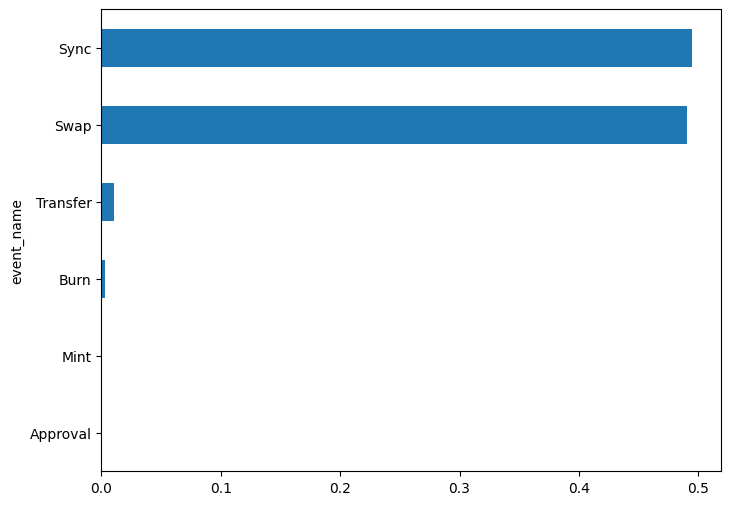

In [3]:
data.value_counts("event_name", normalize=True).sort_values().plot(kind='barh', figsize=(8, 6))

<Axes: xlabel='block_number'>

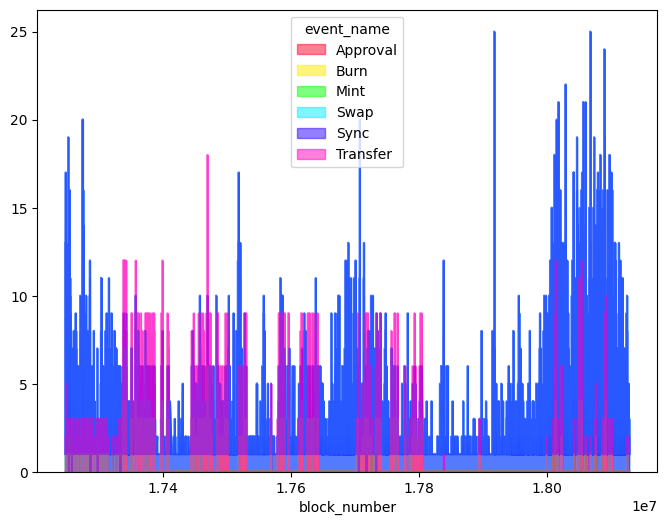

In [4]:
areaplot = data.groupby(['block_number','event_name']).transaction_hash.count().reset_index().pivot(index='block_number', columns='event_name', values='transaction_hash').fillna(0)
areaplot.plot.area(stacked=False, colormap="gist_rainbow",  figsize=(8, 6))

In [5]:
areaplot


event_name,Approval,Burn,Mint,Swap,Sync,Transfer
block_number,,,,,,
17248260,0.0,0.0,1.0,0.0,1.0,2.0
17248282,0.0,0.0,0.0,1.0,1.0,0.0
17248291,0.0,0.0,0.0,2.0,2.0,0.0
17248294,0.0,0.0,0.0,2.0,2.0,0.0
17248300,0.0,0.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...
18128428,0.0,0.0,0.0,1.0,1.0,0.0
18128432,0.0,0.0,0.0,1.0,1.0,0.0
18128449,0.0,0.0,0.0,1.0,1.0,0.0
